In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.drop('RowNumber', axis=1, inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## About data

1. **RowNumber** : Corresponds to the record (row) number and has no effect on the output.

2. **CustomerId** : Contains random values and has no effect on customer leaving the bank.

3. **Surname** : The surname of a customer has no impact on their decision to leave the bank.

4. **CreditScore** : Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

5. **Geography** : A customer’s location can affect their decision to leave the bank.

6. **Gender** : It’s interesting to explore whether gender plays a role in a customer leaving the bank.

7. **Age** : This is certainly relevant, since older customers are less likely to leave their bank than younger ones.

8. **Tenure** : Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

9. **Balance** : Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

10. **NumOfProducts** : Refers to the number of products that a customer has purchased through the bank.

11. **HasCrCard** : Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

12. **IsActiveMember** : Active customers are less likely to leave the bank.

13. **EstimatedSalary** : As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

14. **Exited** : Whether or not the customer left the bank.

15. **Complain** : Whether the customer has a complaint or not.

16. **Satisfaction Score** : Score provided by the customer for their complaint resolution.

17. **Card Type** : Type of card held by the customer.

18. **Points Earned** : The points earned by the customer for using a credit card.


In [3]:
df.drop(columns=['CustomerId', 'Surname'], inplace=True)

In [4]:
df.shape

(10000, 15)

In [5]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [6]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

### Overview of Categorical Variables

We create bar charts to get an overview of the categorical variables we have, and in this way, identify any erroneous information in our data.


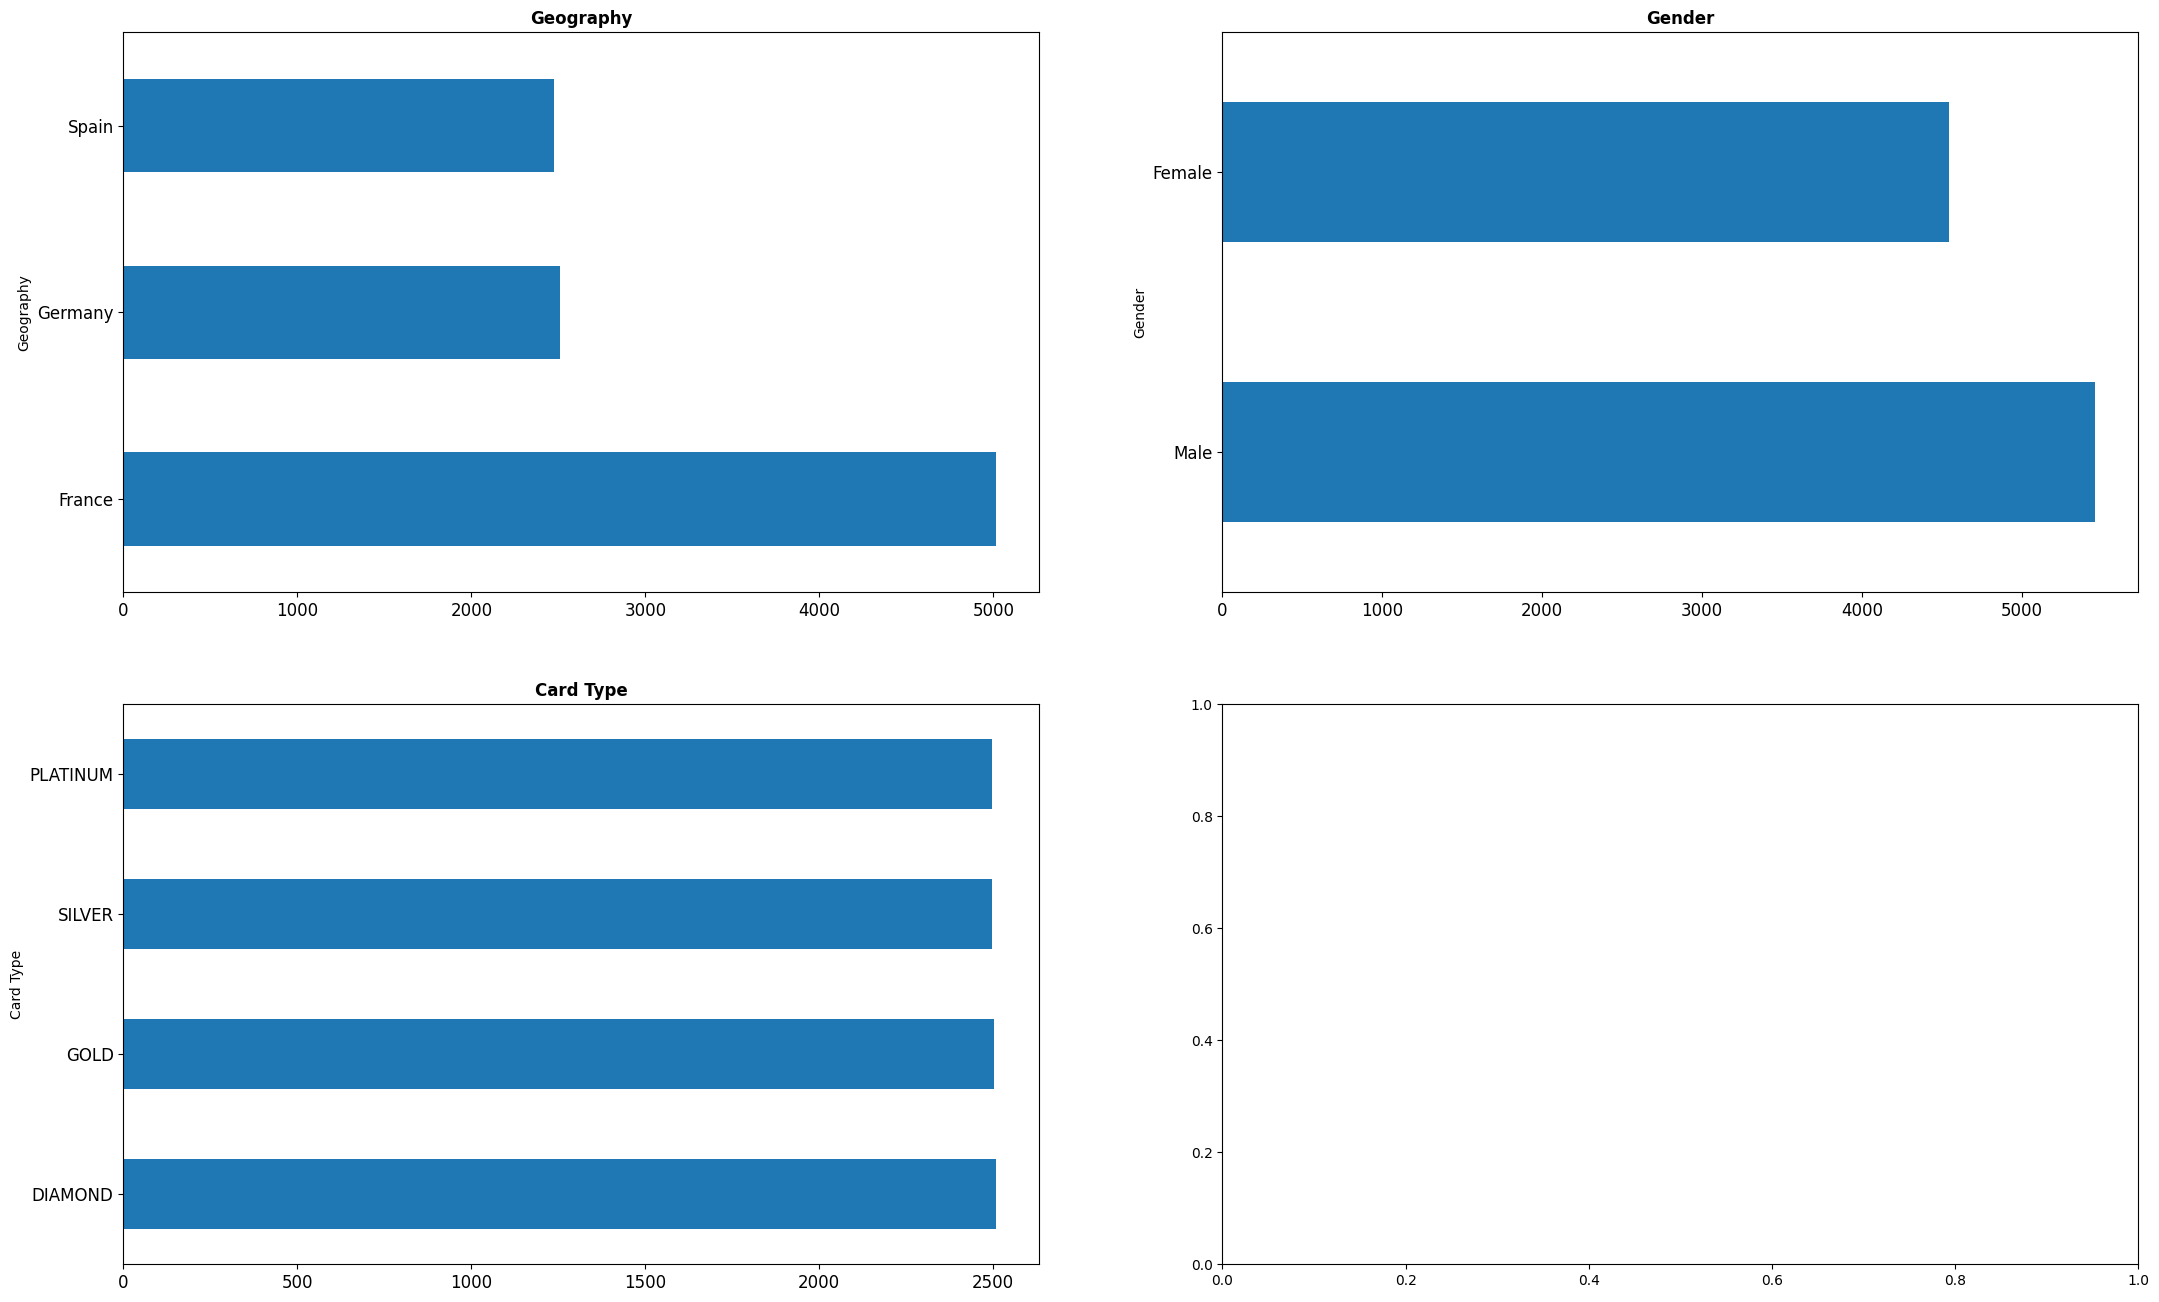

In [7]:
def eda_categorical_charts(cat):
    
    # Calculate the number of rows needed
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    # Define the plot
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (26, rows * 8))

    # Flatten the axes array to iterate over it as if it were 1-dimensional instead of 2
    ax = ax.flat 

    # Create the loop that adds charts
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)
        
eda_categorical_charts(df.select_dtypes('O'))


### Overview of Numerical Variables

We create box plots to examine the distribution of numerical variables, which will also allow us to identify outliers in the information we have.


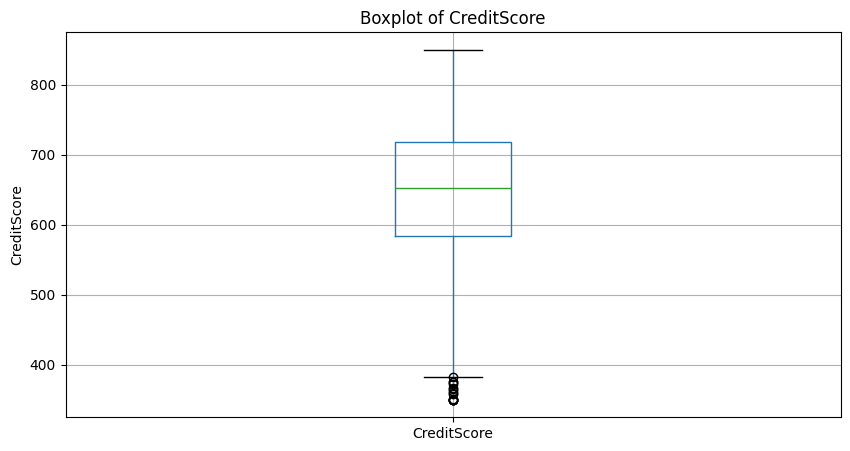

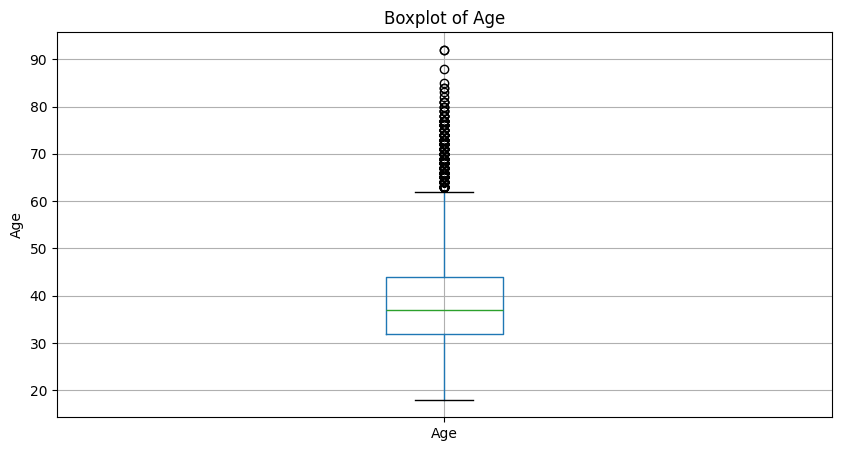

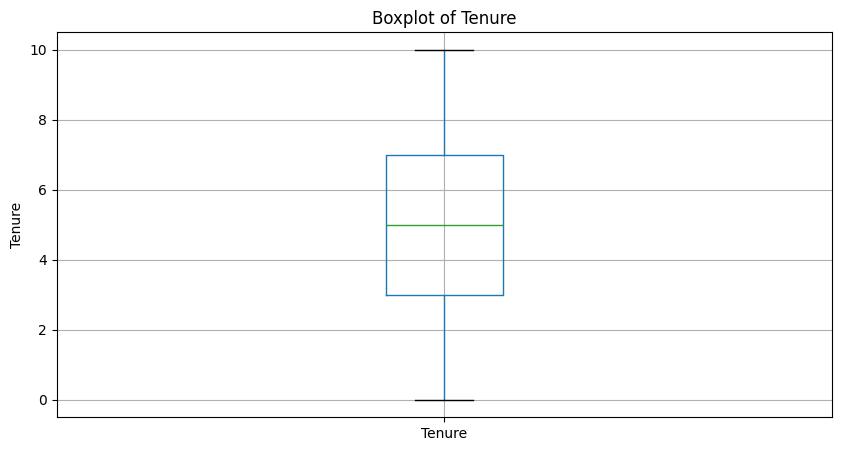

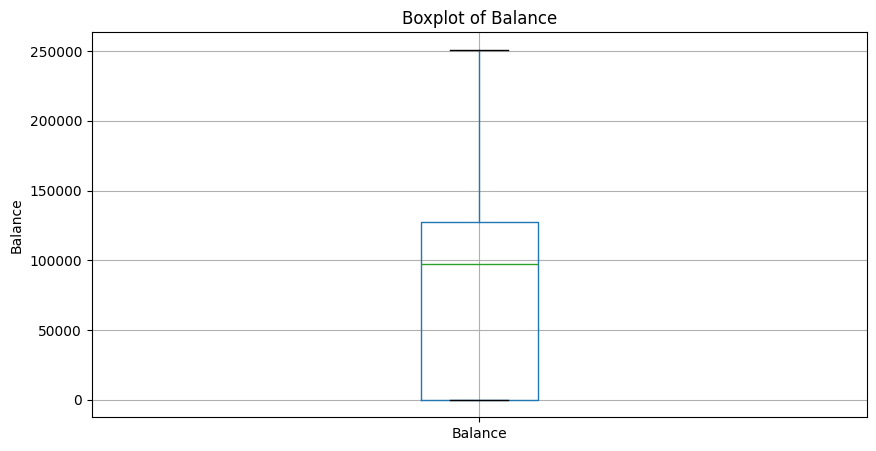

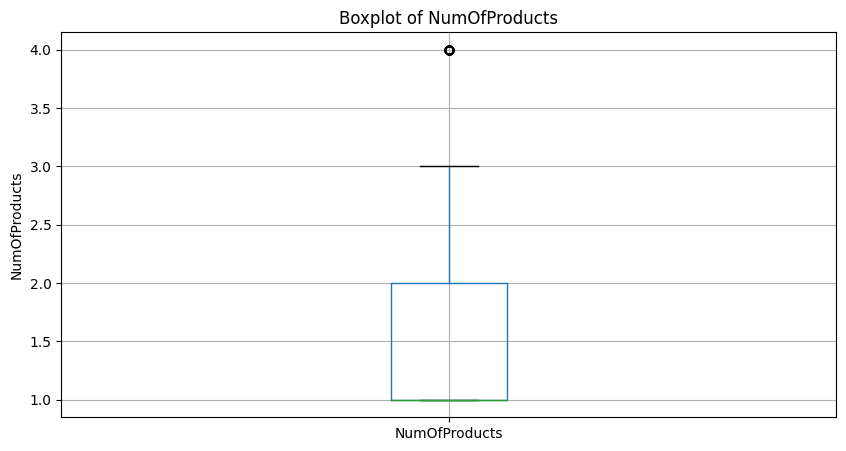

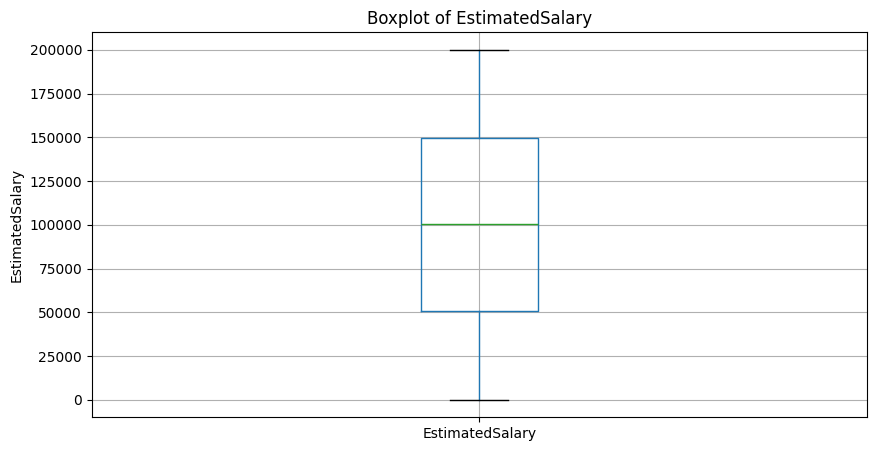

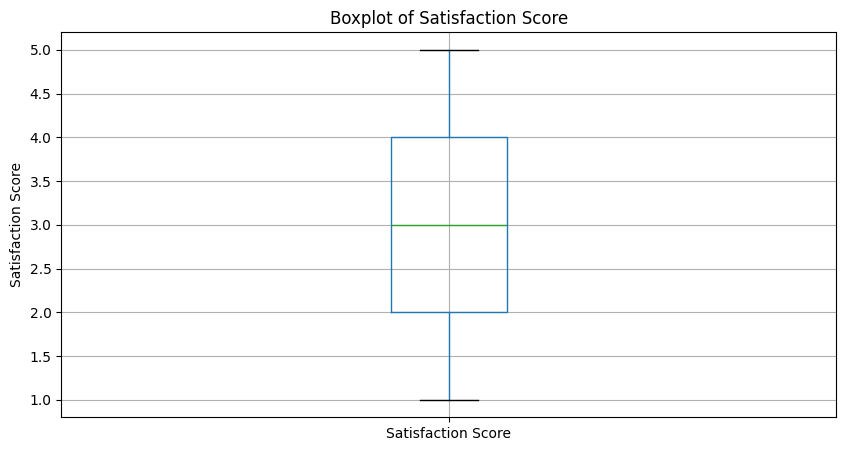

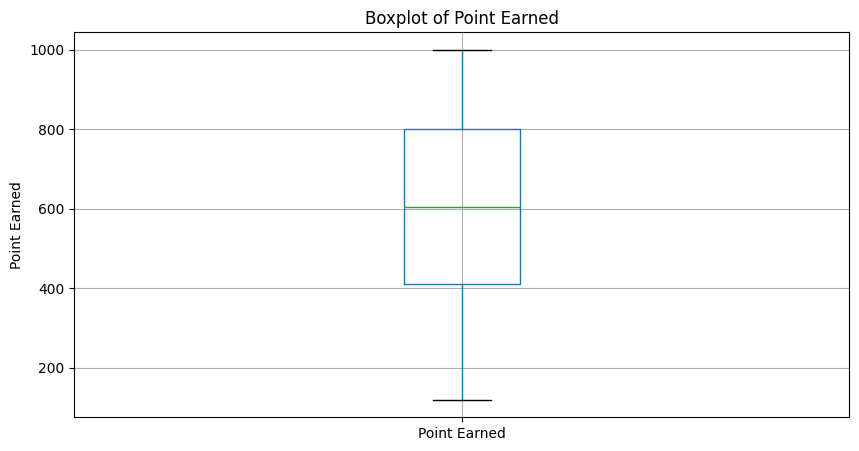

In [32]:
def boxplot_charts(df):
    
    # Select only numeric columns
    df_numeric = df.select_dtypes('number')
    
    # Iterate over each numeric column
    for column in df_numeric.columns:
        plt.figure(figsize=(10, 5))
        df.boxplot(column=column)
        plt.title(f'Boxplot of {column}')
        plt.ylabel(column)
        plt.show()
        

boxplot_charts(df)


In [9]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
Exited,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
Complain,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


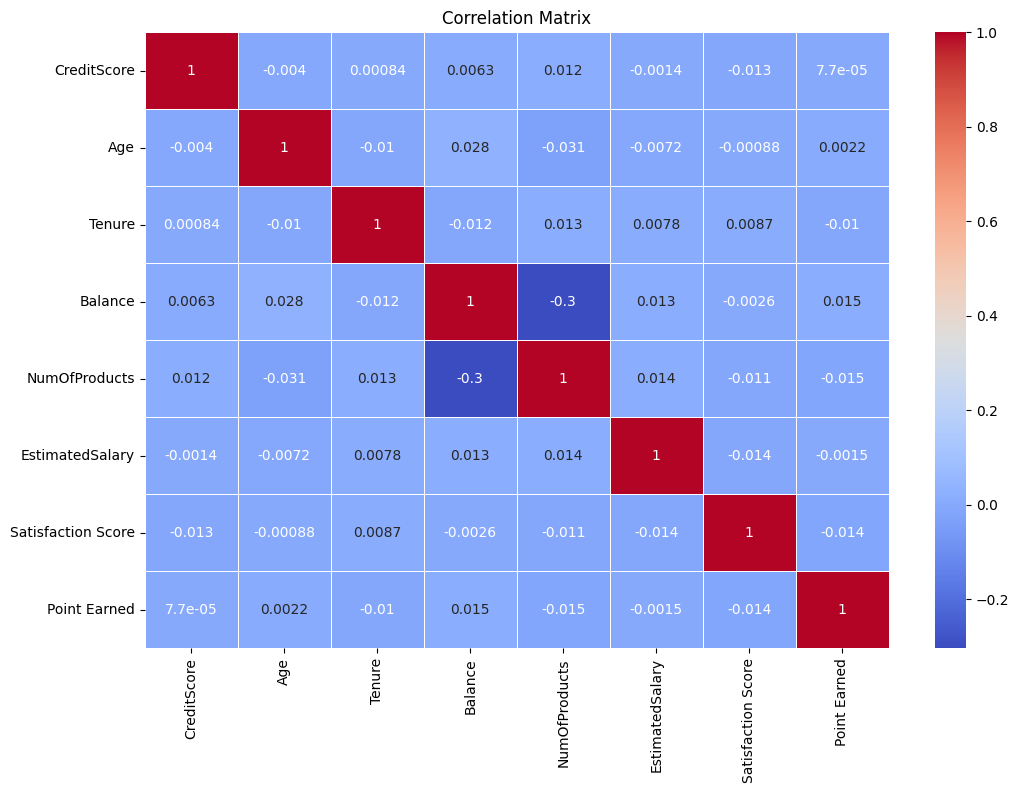

In [34]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
correlation_matrix['Exited'].sort_values(ascending = False)

Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Tenure               -0.013656
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: Exited, dtype: float64

<Axes: >

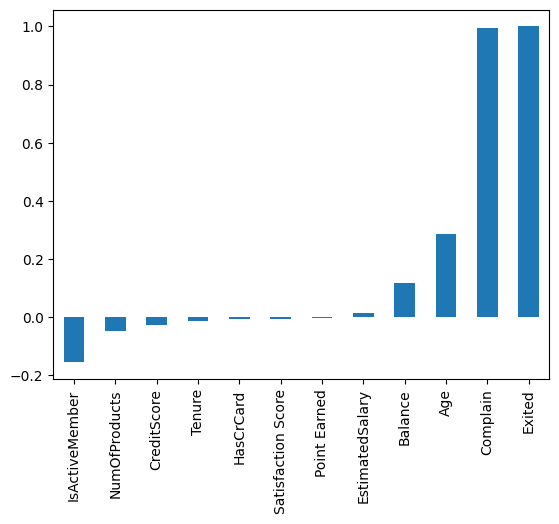

In [12]:
correlation_matrix['Exited'].sort_values().plot(kind='bar')

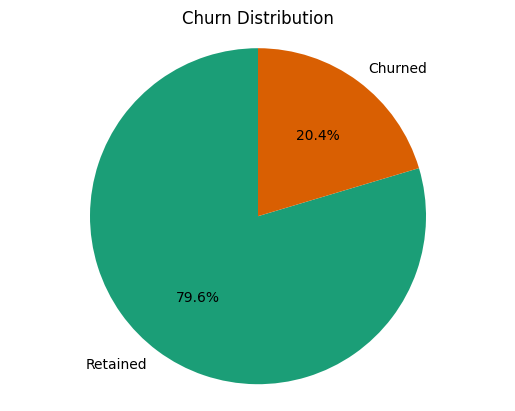

In [13]:
labels = ['Retained', 'Churned']
plt.pie(x = df['Exited'].value_counts(), labels= labels, colors=plt.cm.Dark2.colors, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show() 

### Conversion of 0 and 1 Data to Categorical Variables

We convert the variables from 0 and 1 to Yes or No variables to visualize the information in an easier way.


In [14]:
df['Complain'] = df['Complain'].map({0: 'No', 1: 'Yes'})
df['IsActiveMember'] = df['IsActiveMember'].map({0: 'No', 1: 'Yes'})
df['HasCrCard'] = df['HasCrCard'].map({0: 'No', 1: 'Yes'})
df['Exited'] = df['Exited'].map({0: 'No', 1: 'Yes'})

### We re-explore the categorical variables to get an overview of the data


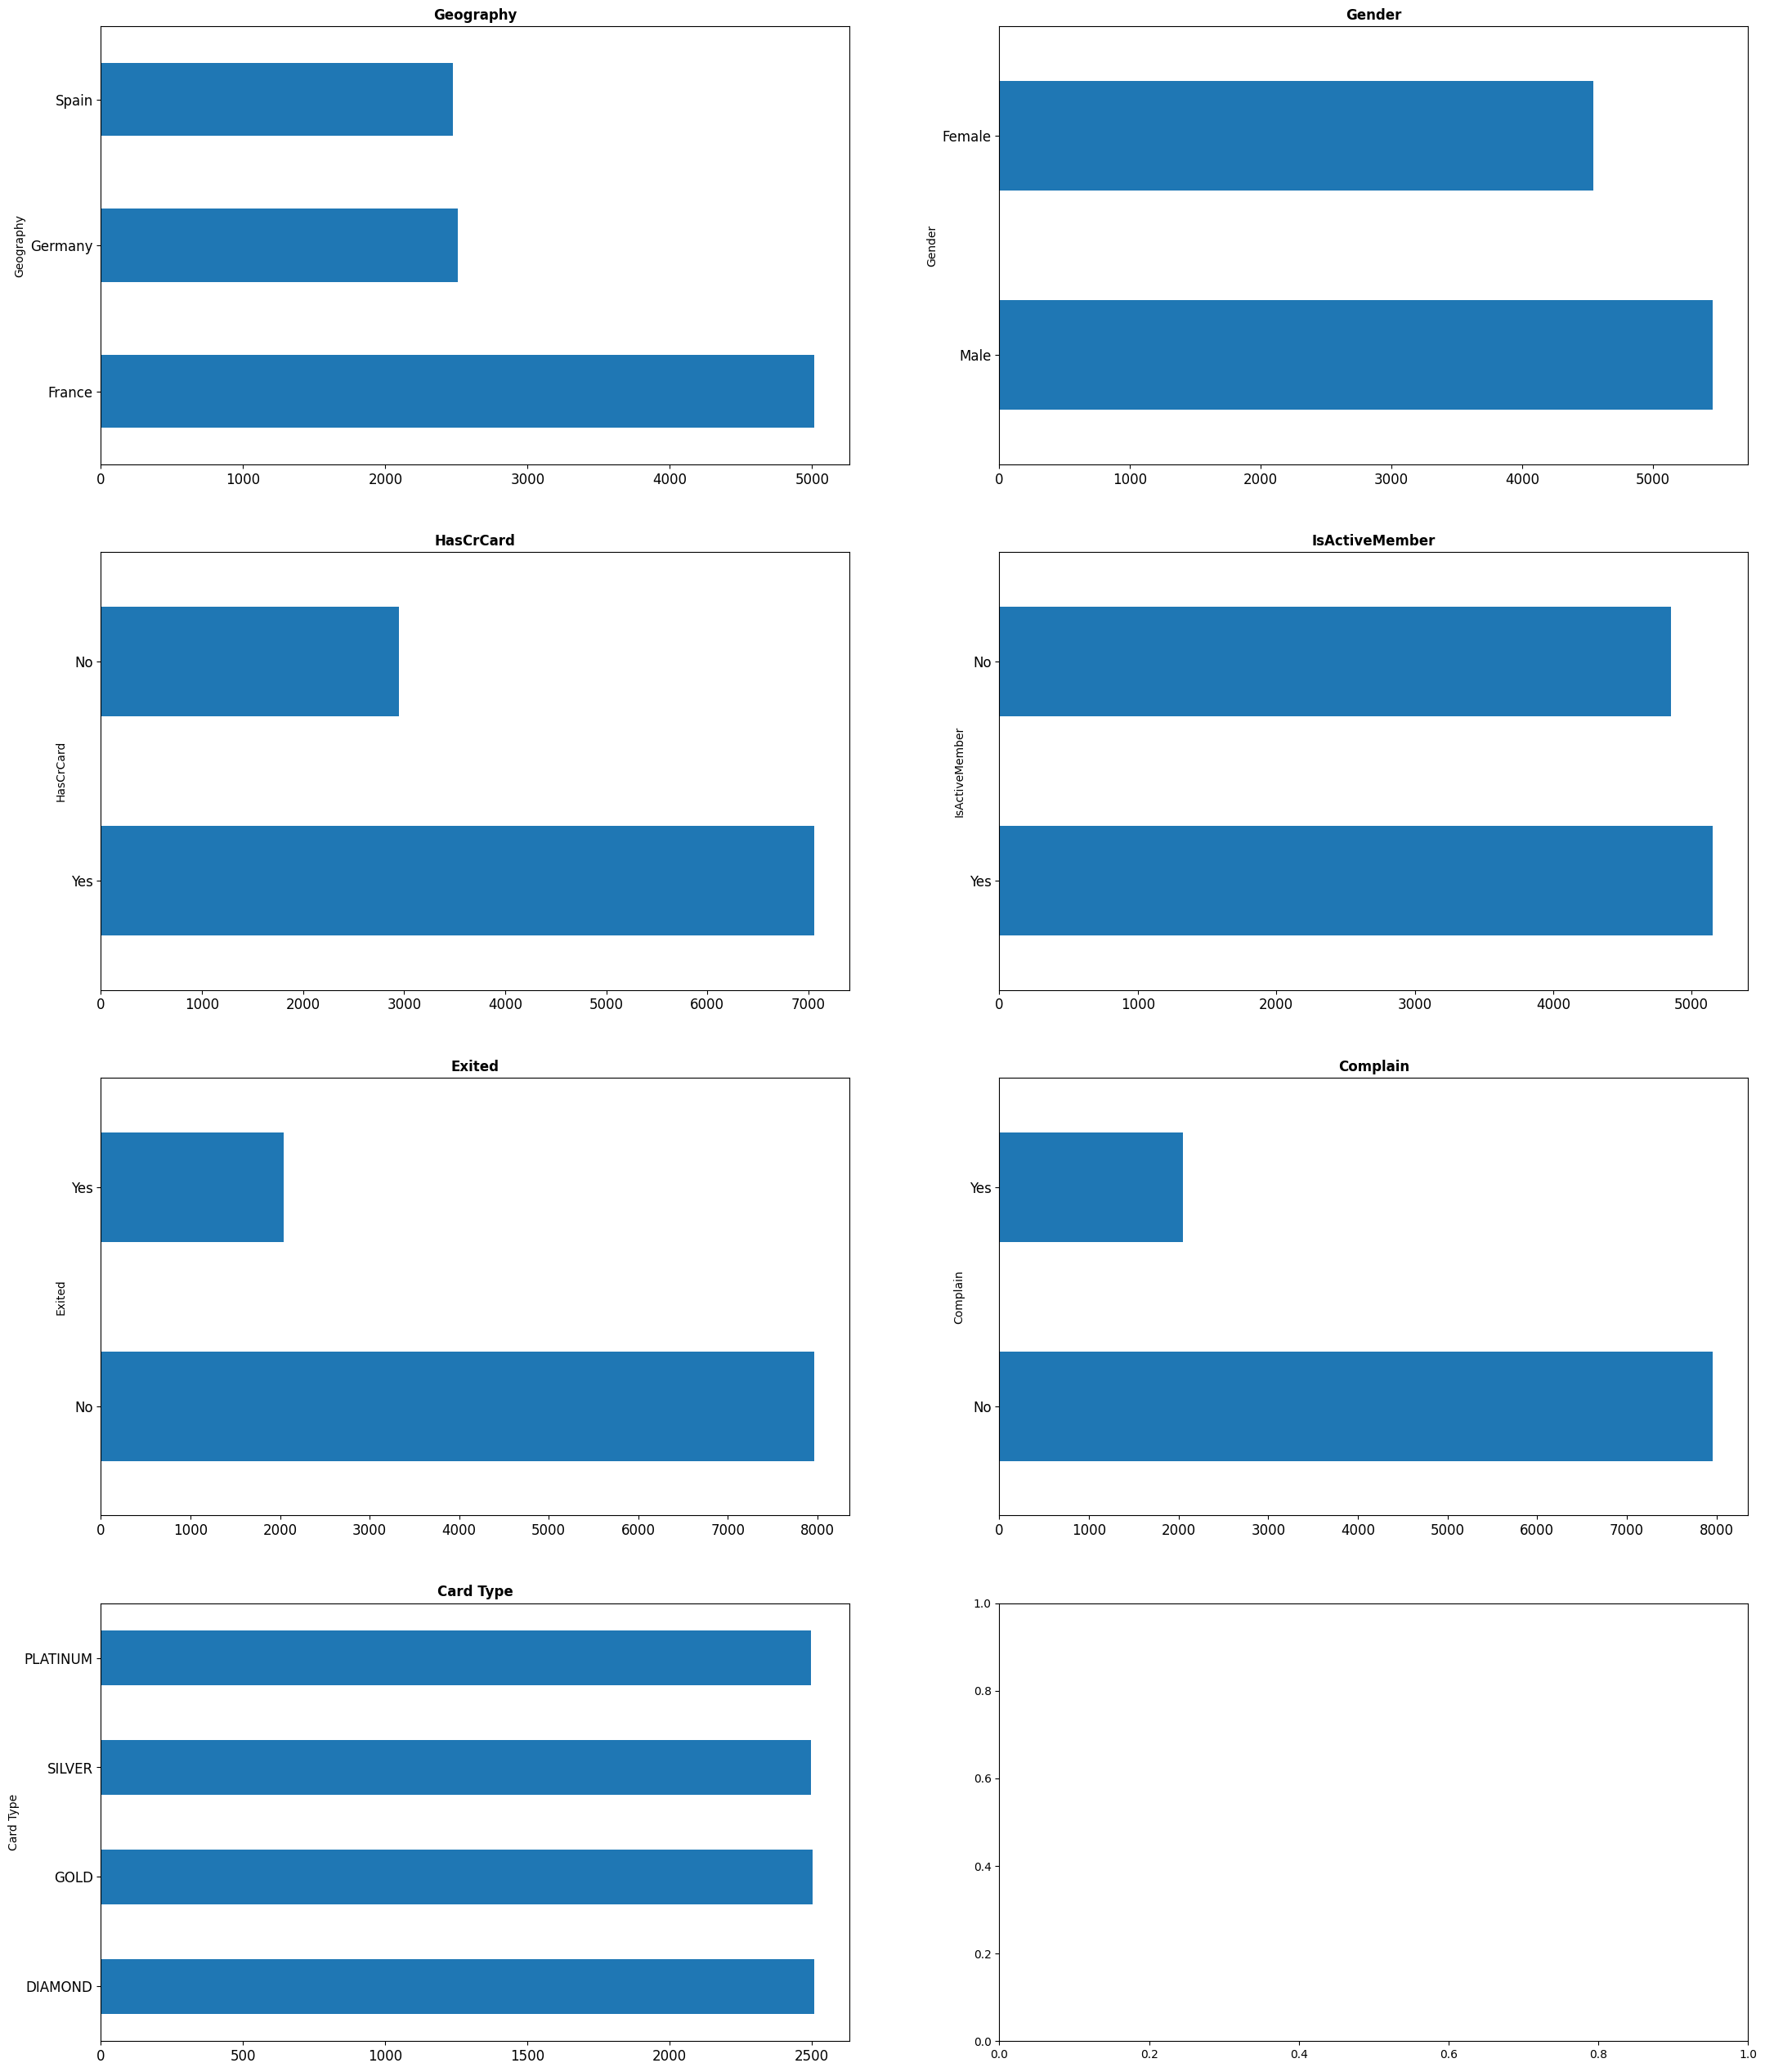

In [35]:
def eda_categorical_charts(cat):
    
    # Calculate the number of rows needed
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    # Define the plot
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (26, rows * 8))

    # Flatten the axes array to iterate over it as if it were 1-dimensional instead of 2
    ax = ax.flat 

    # Create the loop that adds charts
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)
        
eda_categorical_charts(df.select_dtypes('O'))

## Customer Segmentation by Tenure


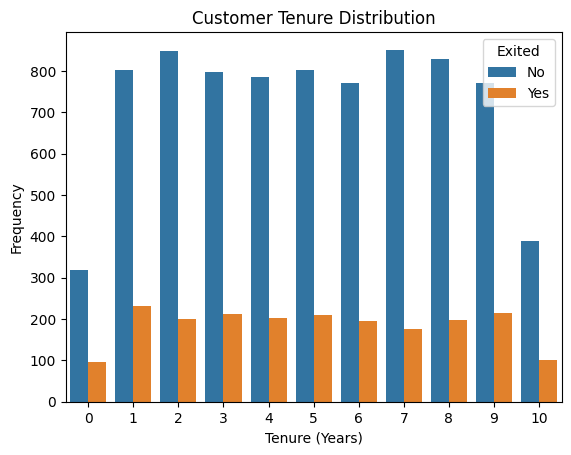

In [36]:
sns.countplot(x='Tenure', data=df, hue='Exited')
plt.title('Customer Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()


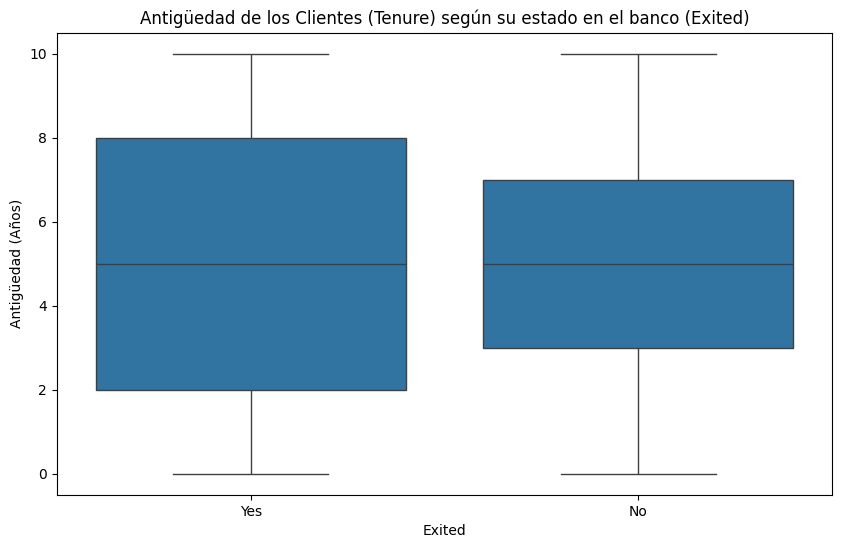

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Antigüedad de los Clientes (Tenure) según su estado en el banco (Exited)')
plt.xlabel('Exited')
plt.ylabel('Antigüedad (Años)')
plt.show()


Exited Tenure_Segment    No  Yes
0            0-2 años  1968  528
1            2-5 años  2385  625
2            5-7 años  1622  373
3           7-10 años  1987  512


C:\Users\juana\AppData\Local\Temp\ipykernel_18752\3298174106.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variable = df.groupby('Tenure_Segment')['Exited'].value_counts().unstack().reset_index()


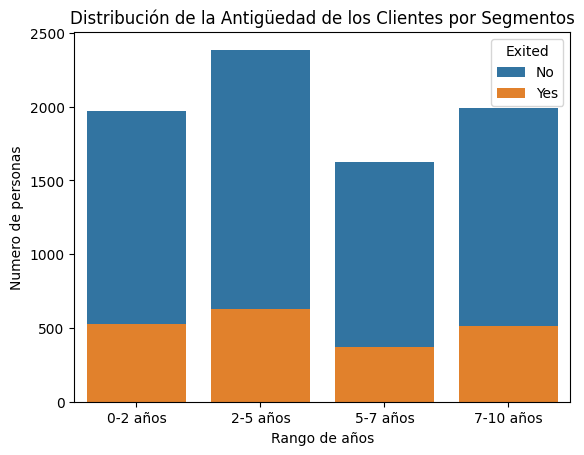

In [18]:
df['Tenure_Segment'] = pd.cut(df['Tenure'], bins=[-0.1,2,5,7,10], labels=['0-2 años', '2-5 años', '5-7 años', '7-10 años'])

variable = df.groupby('Tenure_Segment')['Exited'].value_counts().unstack().reset_index()

print(variable)

sns.barplot(x='Tenure_Segment', y='No', data=variable, label='No')
sns.barplot(x='Tenure_Segment', y='Yes', data=variable, label='Yes')
plt.title('Distribución de la Antigüedad de los Clientes por Segmentos')
plt.ylabel('Numero de personas')
plt.xlabel('Rango de años')
plt.legend(title='Exited')
plt.show()

## Impacto del puntaje crediticio en el abandono

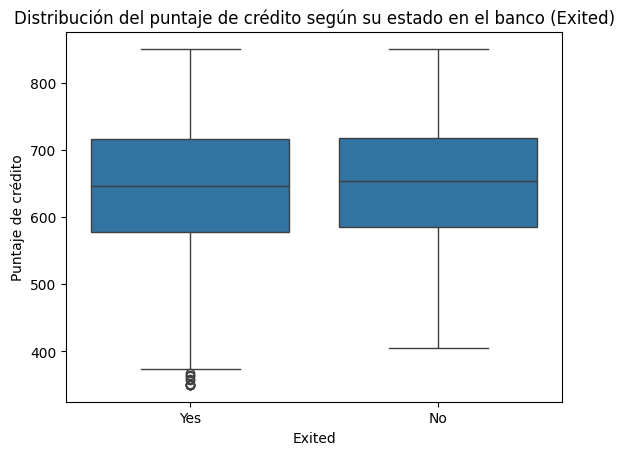

In [19]:
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Distribución del puntaje de crédito según su estado en el banco (Exited)')
plt.xlabel('Exited')
plt.ylabel('Puntaje de crédito')
plt.show()

C:\Users\juana\AppData\Local\Temp\ipykernel_18752\2423463301.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_creditscore = df.groupby(df.Credit_Segment).Exited.value_counts().unstack().reset_index()


Exited Credit_Segment    No  Yes  Tasa_Abandono
0               0-600  2401  665           22.0
1             600-700  3065  753           20.0
2             700-800  1978  493           20.0
3             800-900   518  127           20.0
4            900-1000     0    0            NaN


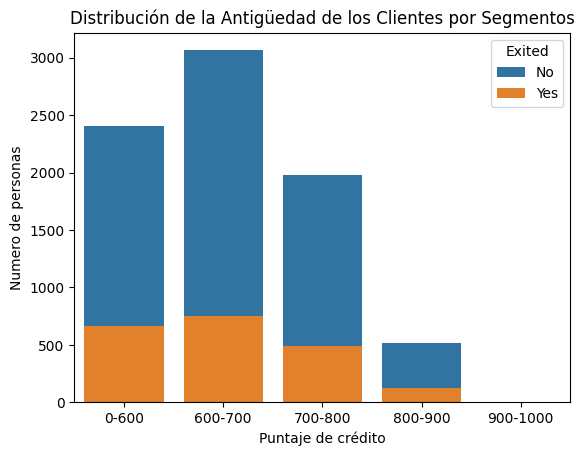

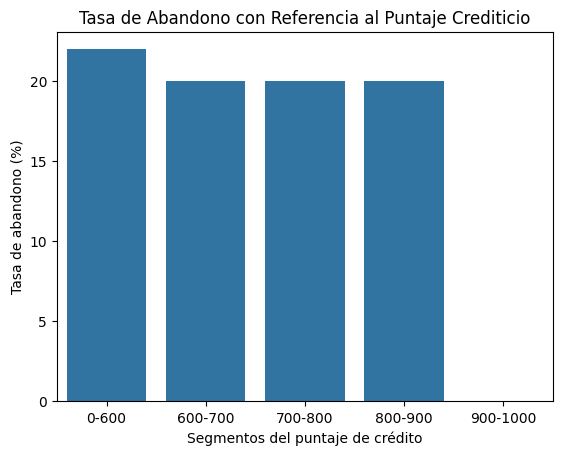

In [20]:
df['Credit_Segment'] = pd.cut(df['CreditScore'], bins=[0, 600, 700, 800, 900, 1000], labels=['0-600', '600-700', '700-800', '800-900', '900-1000'])

abandono_creditscore = df.groupby(df.Credit_Segment).Exited.value_counts().unstack().reset_index()

abandono_creditscore['Tasa_Abandono'] = ((abandono_creditscore.Yes /(abandono_creditscore.No + abandono_creditscore.Yes)) * 100).round()

print(abandono_creditscore)

sns.barplot(x='Credit_Segment', y='No', data=abandono_creditscore, label='No')
sns.barplot(x='Credit_Segment', y='Yes', data=abandono_creditscore, label='Yes')
plt.title('Distribución de la Antigüedad de los Clientes por Segmentos')
plt.ylabel('Numero de personas')
plt.xlabel('Puntaje de crédito')
plt.legend(title='Exited')
plt.show()

sns.barplot(x='Credit_Segment', y='Tasa_Abandono', data=abandono_creditscore)
plt.title('Tasa de Abandono con Referencia al Puntaje Crediticio')
plt.ylabel('Tasa de abandono (%)')
plt.xlabel('Segmentos del puntaje de crédito')
plt.show()


### Relación entre el balance de la cuenta (Balance) y el abandono

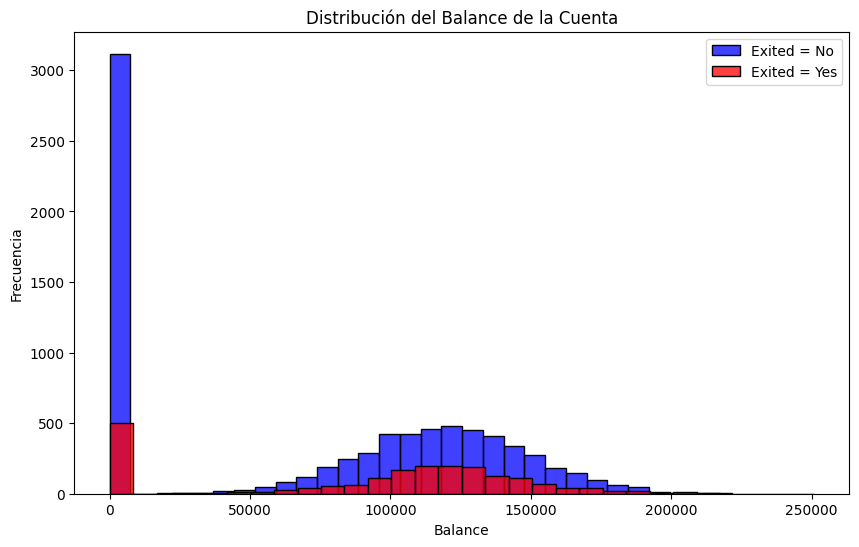

In [21]:

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Exited'] == 'No']['Balance'], kde=False, color='blue', label='Exited = No', bins=30)
sns.histplot(df[df['Exited'] == 'Yes']['Balance'], kde=False, color='red', label='Exited = Yes', bins=30)

plt.title('Distribución del Balance de la Cuenta')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [22]:
df[df['Balance'] < 30000].Balance.value_counts()

Balance
0.00        3617
14262.80       1
27755.97       1
28082.95       1
24043.45       1
29602.08       1
16893.59       1
12459.19       1
23503.31       1
27517.15       1
28649.64       1
3768.69        1
27288.43       1
Name: count, dtype: int64

C:\Users\juana\AppData\Local\Temp\ipykernel_18752\920698759.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_abandonment = df.groupby('Balance_Segment')['Exited'].value_counts().unstack().reset_index()


Exited Balance_Segment    No  Yes  Tasa_Abandono
0                0-25k  3119  504           14.0
1              25k-50k    47   22           32.0
2              50k-75k   274   75           21.0
3             75k-100k   934  226           19.0
4            100k-125k  1510  558           27.0
5            125k-150k  1333  429           24.0
6            150k-175k   582  156           21.0
7            175k-200k   148   49           25.0
8            200k-225k    15   17           53.0
9            225k-250k     0    1          100.0


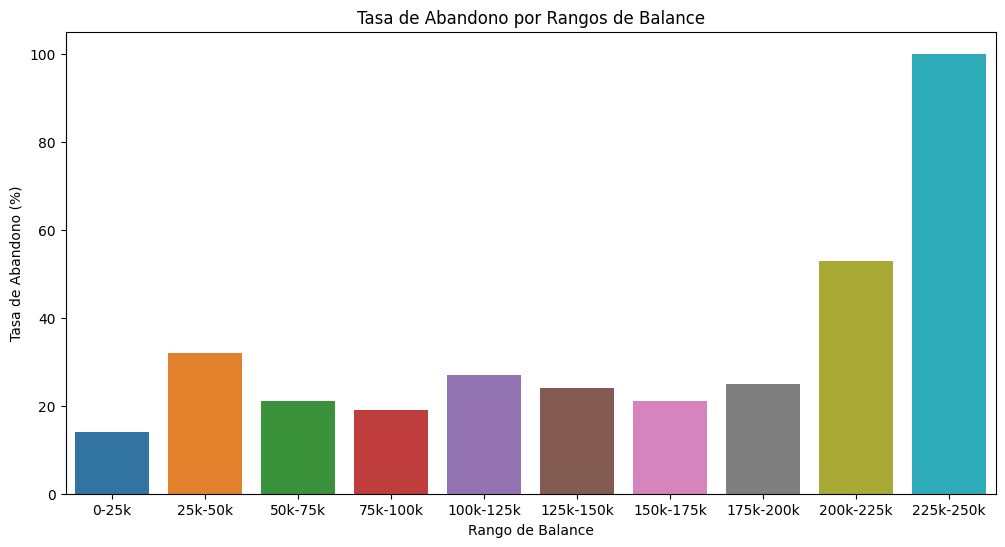

In [23]:
# Crear rangos de balance
df['Balance_Segment'] = pd.cut(df['Balance'], bins=[-0.1, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000], labels=['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k', '150k-175k', '175k-200k', '200k-225k', '225k-250k'])

# # Calcular el número de clientes por rango de balance y estado de abandono
balance_abandonment = df.groupby('Balance_Segment')['Exited'].value_counts().unstack().reset_index()
balance_abandonment

balance_abandonment['Tasa_Abandono'] = (balance_abandonment['Yes'] / (balance_abandonment['Yes'] + balance_abandonment['No']) * 100).round()

print(balance_abandonment)

plt.figure(figsize=(12, 6))
sns.barplot(x='Balance_Segment', y='Tasa_Abandono', data=balance_abandonment, hue='Balance_Segment')
plt.title('Tasa de Abandono por Rangos de Balance')
plt.xlabel('Rango de Balance')
plt.ylabel('Tasa de Abandono (%)')
plt.show()

## Segmentación por país

In [24]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned',
       'Tenure_Segment', 'Credit_Segment', 'Balance_Segment'],
      dtype='object')

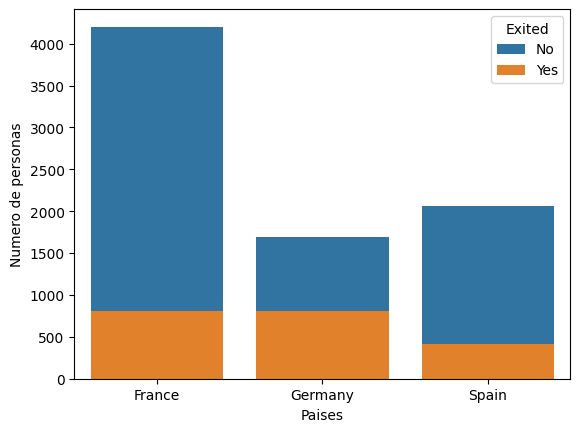

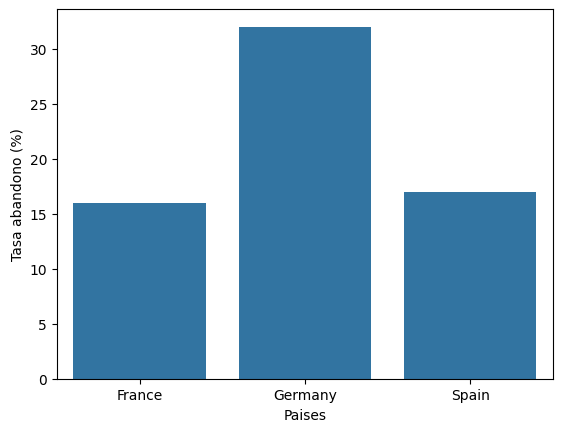

In [25]:
abandono_pais = df.groupby(df.Geography).Exited.value_counts().unstack().reset_index().rename(columns={0: 'No', 1: 'Yes'})


abandono_pais['tasa_abandono'] = ((abandono_pais.Yes /(abandono_pais.No + abandono_pais.Yes)) * 100).round()

sns.barplot(x='Geography', y='No', data=abandono_pais, label='No')
sns.barplot(x='Geography', y='Yes', data=abandono_pais, label='Yes')
plt.title('')
plt.ylabel('Numero de personas')
plt.xlabel('Paises')
plt.legend(title='Exited')
plt.show()

sns.barplot(x='Geography', y='tasa_abandono', data=abandono_pais)
plt.ylabel('Tasa abandono (%)')
plt.xlabel('Paises')
plt.show()



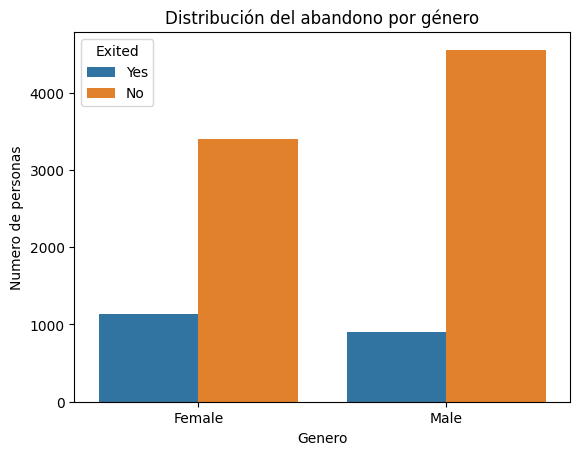

In [26]:
sns.countplot(x='Gender',hue='Exited', data=df)
plt.xlabel('Genero')
plt.ylabel('Numero de personas')
plt.title('Distribución del abandono por género')
plt.show()

In [27]:
abandono_genero = df.groupby('Gender')['Exited'].value_counts().unstack().reset_index()
rate = (abandono_genero.Yes / (abandono_genero.Yes + abandono_genero.No) * 100).round(2)
abandono_genero.loc[:,'Rate'] = rate
abandono_genero


Exited,Gender,No,Yes,Rate
0,Female,3404,1139,25.07
1,Male,4558,899,16.47


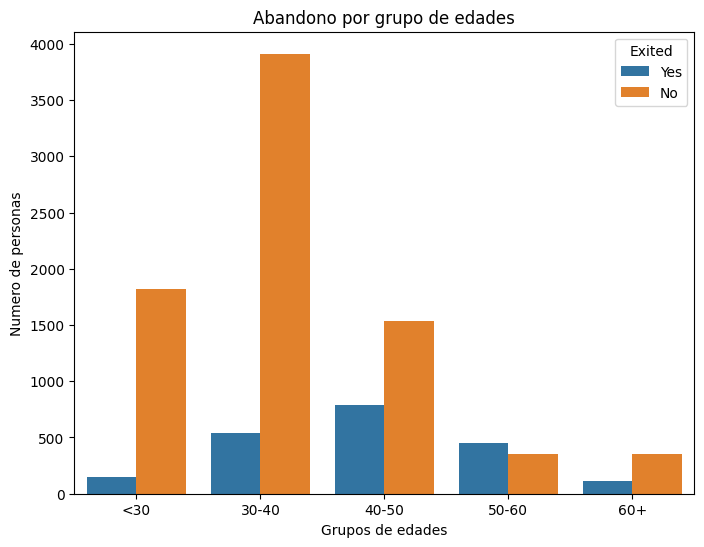

In [28]:
df['Age_Group'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, np.inf], labels = ['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize = (8,6))
plt.title('Abandono por grupo de edades')
sns.countplot(data = df, x = 'Age_Group', hue = 'Exited')
plt.ylabel('Numero de personas')
plt.xlabel('Grupos de edades')
plt.show() 

In [29]:
abandono_edad = df.groupby('Age_Group')['Exited'].value_counts().unstack().reset_index()
rate = (abandono_edad.Yes / (abandono_edad.Yes + abandono_edad.No) * 100).round(2)
abandono_edad.loc[:,'Rate'] = rate
abandono_edad

C:\Users\juana\AppData\Local\Temp\ipykernel_18752\1233032146.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_edad = df.groupby('Age_Group')['Exited'].value_counts().unstack().reset_index()


Exited,Age_Group,No,Yes,Rate
0,<30,1820,148,7.52
1,30-40,3912,539,12.11
2,40-50,1532,788,33.97
3,50-60,349,448,56.21
4,60+,349,115,24.78


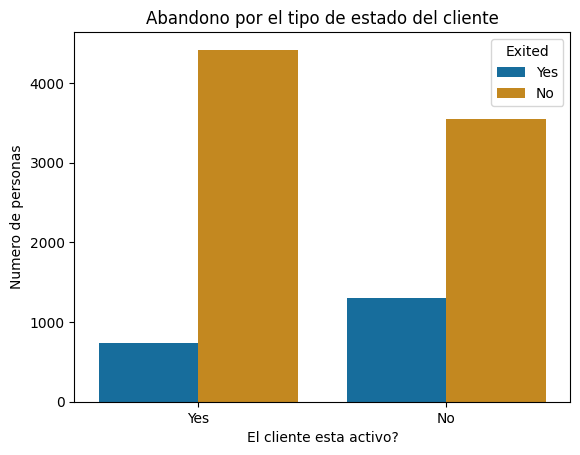

In [30]:
sns.countplot(data = df, x= 'IsActiveMember', hue = 'Exited', palette = 'colorblind')
plt.title('Abandono por el tipo de estado del cliente')
plt.ylabel('Numero de personas')
plt.xlabel('El cliente esta activo?')
plt.show() 

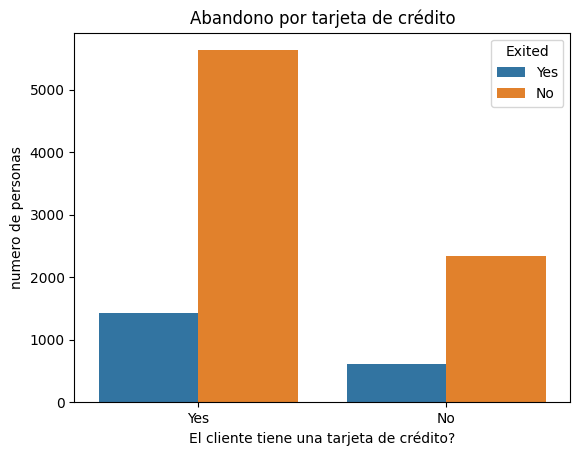

In [31]:
sns.countplot(data = df, x= 'HasCrCard', hue = 'Exited')
plt.title('Abandono por tarjeta de crédito')
plt.xlabel('El cliente tiene una tarjeta de crédito?')
plt.ylabel('numero de personas')
plt.show() 